In [1]:
%%js
MathJax.Hub.Config({
  TeX: { 
    equationNumbers: { autoNumber: "AMS" } 
    }
});


<IPython.core.display.Javascript object>

# Моделирование
## Распределение амплитуд

In [2]:
from pylab import *
rcParams['figure.figsize'] = [7, 6]
rcParams['axes.labelsize'] = 20
from math import pi
from IPython.display import display, Math,Latex
import pandas as pd
import time

$\renewcommand{\phi}{\varphi}$
Для моделирования случайной поверхности $\Sigma(\vec{r},t)$ используется ее представление в виде суперпозиции плоских волн (гармоник) с различными частотами $\omega_n$ и случайными фазами $\Psi_{nm}$, бегущих под разными азимутальными углами $\phi_m$:
$$\begin{equation*}
    \Sigma(\vec{r},t)=\sum\limits_{n=1}^N\sum_{m=1}^M A_n
    cos(\omega_nt+\vec{k_n}\vec{r}+\Psi_{nm})\cdot\Phi_{nm}
    (\omega_n,\phi_m)
    \label{eq:1}
\end{equation*}$$
Далее будут приведены основные соотношения, необходимые для этого уравнения

In [3]:
def find_decision(omega):
    P = 9.8*1000.0/0.074;
    Q = -1000.0*omega**2/0.074;
    x1= -Q/2.0 + sqrt( (Q/2)**2 + (P/3)**3 )
    x2= -Q/2.0 - sqrt( (Q/2)**2 + (P/3)**3 )
    k=x1**(1/3)-(-x2)**(1/3)
    return k

def det(k): 
#    Функция возвращает детерминант при переходе от частоты к 
#волновым числам по полному дисперсионному
    det=(9.8+3*k**2*0.074/1000)/(2*sqrt(9.8*k+k**3*0.074/1000) )
    return det

Дисперсионное уравнение $\omega(k)=\sqrt{ gk+0.074\frac{k}{1000} }$

Вычисление безразмерной частоты $\tilde{\omega}$ по безразмерному разгону $\tilde{x}$ 

Вычисление безразмерных коэффициентов $\gamma$ и $\alpha$

Время выполнения --- 0.5137646198272705 c


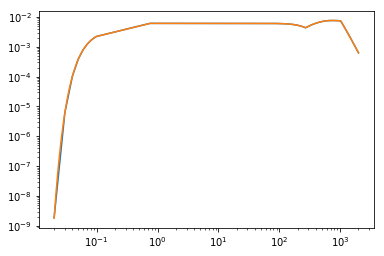

In [4]:
global g
g=9.81
def k_max(omega_max):
    k_max=omega_max**2/g
    return k_max

def omega_k(k): # Пересчет волнового числа в частоту по полному дисперсионному
    omega_k=(g*k+0.074*k**3/1000)**(1/2) #Сложное дисперсионное
    return omega_k  

def full_spectrum(k,x=20170, long_calculate=True):
    def JONSWAP(k):
        if k<=k_m:
            sigma=0.07
        else:
            sigma=0.09
        Sw=(
            Alpha(x)/2*k**(-3)*exp(-1.25*(k_m/k)**2 )*
            Gamma(x)**(exp(- ( sqrt(k/k_m)-1)**2 / (2*sigma**2) ))
           )
        return Sw

    def Gamma(x):
        if x>=20170:
            return 1
        gamma=(
               +5.253660929
               +0.000107622*x
               -0.03778776*sqrt(x)
               -162.9834653/sqrt(x)
               +253251.456472*x**(-3/2)
              )
        return gamma

    def Alpha(x):
        if x>=20170:
            return 0.0081
        alpha=array([],dtype='float64')
        alpha=[( 
               +0.0311937
               -0.00232774*log(x)
               -8367.8678786/x**2
               +4.5114599e+300*exp(-x)*1e+300*1e+17
    #            +4.5114599e+17*exp(-x)
              )]
        return alpha[0]

    def Omega(x): #Вычисление безразмерной частоты по безразмерному разгону
        if x>=20170:
            return 0.835
        omega_tilde=(0.61826357843576103 
                     + 3.52883010586243843e-06*x
                     - 0.00197508032233982112*sqrt(x)
                     + 62.5540113059129759/sqrt(x)
                     - 290.214120684236224/x
        )
        return omega_tilde

    def spectrum1(k):


        omega0=omega_k(limit_k[0])
        beta0= JONSWAP(limit_k[0])*omega0**4/det(limit_k[0])

        omega0=omega_k(k)

        return beta0/omega0**4*det(k)

    def spectrum2(k):


        omega0=omega_k(limit_k[1])
        beta0= spectrum1(limit_k[1])*omega0**5/det(limit_k[1])

        omega0=omega_k(k)

        return beta0/omega0**5*det(k)

    def spectrum3(k):


        omega0=omega_k(limit_k[2])
        beta0= spectrum2(limit_k[2])*omega0**2.7/det(limit_k[2])

        omega0=omega_k(k)

        return beta0/omega0**2.7*det(k)

    def spectrum4(k):


        omega0=omega_k(limit_k[3])
        beta0= spectrum3(limit_k[3])*omega0**5/det(limit_k[3])

        omega0=omega_k(k)

        return beta0*det(k)/omega0**5
    
#     def spectrum(k):
#         omega0=[omega_k(limit_k[i]) for i in range(4)]
#         p=[4,5,2.7,5]
#         S=[0,0,0,0]
#         S[0]=lambda a: JONSWAP(limit_k[0]) * (omega0[0]/omega_k(a))**p[0] * det(a)/det(limit_k[0])
#         S[1]=lambda a: S[0](limit_k[1])    * (omega0[1]/omega_k(a))**p[1] * det(a)/det(limit_k[1])
#         S[2]=lambda a: S[1](limit_k[2])    * (omega0[2]/omega_k(a))**p[2] * det(a)/det(limit_k[2])
#         S[3]=lambda a: S[2](limit_k[3])    * (omega0[3]/omega_k(a))**p[3] * det(a)/det(limit_k[3])
#         spectrum=zeros((len(k),4))
#         for j in range(len(k)):
#             for i in range(4):
#                 spectrum[j][i]=S[i](k[j])
#         return spectrum
    
    gamma,alpha,omega_m=Gamma(x),Alpha(x),Omega(x)
    
    try:
        full_spectrum=zeros(len(k))
    except:
        full_spectrum=[0]
        k=[k]
    if long_calculate==False:
        k=logspace(log10(k[0]),log10(k[-1]),1000)
        
    omega=omega_m*g/U10
    global k_m
    k_m=k_max(omega)
    limit_1= 1.2   #{ НАЧИНАЕТСЯ  - 1/(W**4) }
    limit_2=(
             +0.371347584096022408 
             + 0.290241610467870486*U10
             + 0.290178032985796564/U10
            )
    limit_3= 270.0 #{ НАЧИНАЕТСЯ 1/W**2.7 }
    limit_4= 1020.0 #{ НАЧИНАЕТСЯ 1/W*5 }

    limit_k=np.zeros(4)
    limit_k[0]=find_decision(limit_1*omega)
    limit_k[1]=find_decision(limit_2*omega)
    limit_k[2]=limit_3
    limit_k[3]=limit_4

    for i in range(len(k)):
        if k[i] <= limit_k[0]:
            full_spectrum[i] =  JONSWAP(k[i])
        elif k[i] <= limit_k[1]:
            full_spectrum[i] = spectrum1(k[i])
        elif k[i] <= limit_k[2]:
            full_spectrum[i] = spectrum2(k[i])
        elif k[i] <= limit_k[3]:
            full_spectrum[i] = spectrum3(k[i])
        else:
            full_spectrum[i] = spectrum4(k[i])

#     S=spectrum(k)
#     for i in range(len(k)):
#         if k[i] <= limit_k[0]:
#             full_spectrum[i] =  JONSWAP(k[i])
#         elif k[i] <= limit_k[1]:
#             full_spectrum[i] = S[i][0]
#         elif k[i] <= limit_k[2]:
#             full_spectrum[i] = S[i][1]
#         elif k[i] <= limit_k[3]:
#             full_spectrum[i] = S[i][2]
#         else:
#             full_spectrum[i] = S[i][3]

    return full_spectrum

U10=10
name='SEAWVS_1.dat'
data=pd.read_csv(name,sep='\s+')
KT=array(data['KT'])
OUR=array(data['OUR'])
loglog(KT,OUR)
k=linspace(KT[0],KT[-1],len(KT))
k=logspace(log10(k[0]),log10(k[-1]),10000)
start_time = time.time()
S=full_spectrum(k,x=20170)
print("Время выполнения --- %s c" % (time.time() - start_time))
loglog(k,k**3*S)


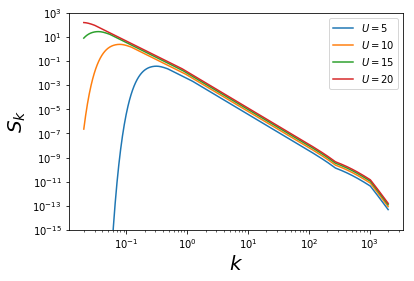

In [5]:
x=15000

U10=5
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=5$')

U10=10
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=10$')

U10=15
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=15$')

U10=20
k=logspace(log10(k[0]),log10(k[-1]),1000)
C=full_spectrum(k,x)
loglog(k,C,label='$U=20$')
legend()

xlabel('$k$')
ylabel('$S_{k}$')
ylim((10**(-15),1000))
show()

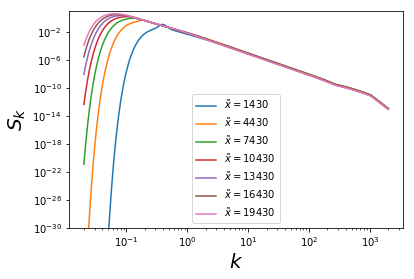

In [6]:
xx=arange(1430,20000,3000)
U10=10
for n in xx:
    x=n
    k=logspace(log10(k[0]),log10(k[-1]),1000)
    C=full_spectrum(k,n)
    loglog(k,C,label='$\\~{x}=$'+'{0}'.format(x))

ylim([10**-30,10])
xlabel('$k$')
ylabel('$S_{k}$')
legend()

## Угловое распределение
Угловое распределение $\Phi_{\omega}$ описывается следующей формулой:
$$\Phi_{\omega}=A\cdot\frac{2}{\exp(2B\phi)+\exp(-2B\phi)}=\frac{A}{\cosh(2B\phi)},\, -\pi\leq\phi\leq\pi$$
Где $B=10^b$, а b описывается следующей формулой:
$$b=-0.28+0.65\exp\left\{-0.75\log(\frac{k}{k_m})\right\}+0.01\exp\left\{0.2+0.7\lg(\frac{k}{k_m})\right\}$$

<IPython.core.display.Math object>

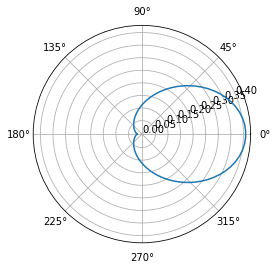

In [7]:
def B(k):
    def b(k):
        b=(
            -0.28+0.65*exp(-0.75*log(k/k_m))
            +0.01*exp(-0.2+0.7*log10(k/k_m))  
          )          
        return b
    B=10**b(k)
    return B

def Normalization(B):
    Normalization=B/arctan(sinh(2*pi*B))
    return Normalization

def Phi(k,phi):
    try:
        Phi=zeros((len(k),len(phi)))
        for i in range(len(k)):
            B0=B(k[i])
            A0=Normalization(B0)
            Phi[i]=A0/cosh(2*B0*phi)
    except:
        B0=B(k)
        A0=Normalization(B0)
        Phi=A0/cosh(2*B0*phi)
    return Phi

x=linspace(-pi,pi,100)
y=Phi(100,x)
polar(x,y)

integral=trapz(y,x,dx=0.1)
display(Math
(
 r'Интеграл\,функции\,распределения:\\'
 +'\displaystyle\int\limits_{-\pi}^{\pi}'
 +'\Phi_{\omega}(\omega,\phi)d\phi'
 +'={0} \simeq  {1}'.format(integral,round(integral,3)) 
)
       )

# Для проверки

Все равно придётся считать

 
 При увеличении числа гармоник происходит
улучшение качества моделируемой поверхности, но возрастает время
счета. Поэтому, как и в случае с угловым распределением, здесь также
было выбрано компромиссное решение. Критерием была выбрана 
    близость корреляционных функций высот $ K_{\sum} (\rho)$ и наклонов вычисленных по исходному спектру $S_{\sum}(\omega)$ и по реализации поверхности $\Sigma (\vec r, t)$:
 
 $$K_{\sum}(\rho)=\int\limits_{(k)}S_{\sum}(k)\cos(k\rho)dk$$
 
 $$K_{\sum}^M(\rho)=\sum\limits_{n=1}^N \frac{A^2_n}{2}\cos(k\rho)$$
  
 $$K_{\sum\theta}(\rho)=\int\limits_{(k)}k^2S_{\sum}(k)\cos(k\rho)dk$$
   
  $$K_{\sum\theta}^M(\rho)=\sum\limits_{n=1}^N \frac{A^2_n k^2}{2}\cos(k\rho)$$

(800, 100)


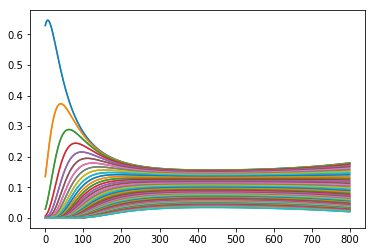

In [8]:
def angle(k,phi):
    angle=sqrt( 2*pi/100 * Phi(k,phi) )
    return angle

def amplitude(k,N):
    # k-- выбранный диапазон волновых чисел
    # N-- количество моделируемых гармоник
    k=logspace(log10(KT[0]),log10(KT[-1]),N)
    omega=omega_k(k)
    dk=zeros(N)
    for i in range(0,N):
        dk[i]=(k[i]-k[i-1])
    dk[0]=dk[1]
    amplitude=sqrt(2*dk * full_spectrum(k))
    return amplitude
N=800
k=logspace(log10(KT[0]),log10(KT[-1]),N)
phi=linspace(-pi,pi,100)
A=angle(k,phi)
print(shape(A))
plot(A)
show()

Количество гармоник N= 800


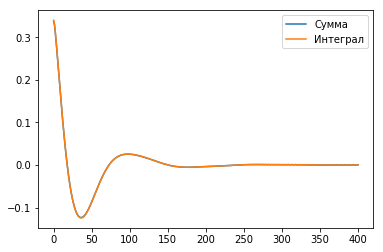

In [13]:
from scipy.integrate import simps
from numpy.linalg import norm
U10=10

def correlation_height(k,rho):
    S=full_spectrum(k)
    integral=zeros(len(rho))
    for i in range(len(rho)):
        integral[i]=simps(S*cos(k*rho[i]),k)
    return integral

def correlation_height_sum(k,rho,N=1000):
    f=0
    A=amplitude(k,N)
    k=logspace(log10(KT[0]),log10(KT[-1]),N)
    f=zeros(len(rho))
    for j in range(len(rho)):
            f[j]=sum( A**2/2*cos(k*rho[j]) )
    return f

def find_garmonics(k,rho):
    N=100
    k=logspace(log10(KT[0]),log10(KT[-1]),10000)
    S=correlation_height_sum(k,rho,N)
    I=correlation_height(k,rho)
    while abs(norm(S-I))>0.01:
        N*=2
        S=correlation_height_sum(k,rho,N)
    print('Количество гармоник N=',N)
    return N
    
k=logspace(log10(KT[0]),log10(KT[-1]),10000)
rho=linspace(0,400,400)
y=zeros(len(rho))
y=correlation_height_sum(k,rho, find_garmonics(k,rho))
y1=correlation_height(k,rho)
plot(rho,y,label='Сумма')
plot(rho,y1,label='Интеграл')
legend()

Количество гармоник N= 800
Дисперсия= 1.5283980632065624
[0.34011259]


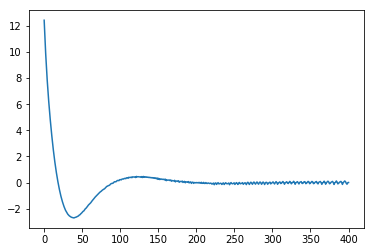

In [17]:
from numpy import random
def model(k,phi,N):
    U10=10
    rho=linspace(0,400,400)
    A=amplitude(k,N)
    F=angle(k,phi)
    psi=array([
    [ random.uniform(0,2*pi) for j in range(100)] 
      for i in range(N)              ])
    def water(x,y=0,t=0):
        
        model=sum(A*cos(k*x))
    return model
N=find_garmonics(k=k,rho=rho)
k=logspace(log10(KT[0]),log10(KT[-1]),N)
sigma=model(k,phi,N)
x=linspace(0,400,400)
phi=linspace(-pi,pi,100)
water=[sigma(i) for i in range(len(x))]
plot(x,water)
dispersion=std(water)
mn=mean(water)
print('Дисперсия=',dispersion)
# print('Среднее=',mn)
print(correlation_height(k,[0]))

# Двумерная функция спектра волнения

## Дисперсия высот

In [11]:
def F1(k,phi):
    F1=full_spectrum(k)*Phi(phi,k)*A(k)
    return F1

## Дисперсия наклонов $\sigma_{xx}$

In [12]:
def sigma_xx(k,phi):
    F2=(
        full_spectrum(k)*(x*cos(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F2
phi=linspace(-pi,pi,1000)
y=sigma_xx(0.06,phi)
plot(phi,y)

ValueError: operands could not be broadcast together with shapes (400,) (1000,) 

## Дисперсия наклонов $\sigma_{yy}$

In [ ]:
def sigma_yy(k,phi):
    F3=(
        full_spectrum(k)*(x*sin(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F3
phi=linspace(-pi,pi,1000)
y=sigma_yy(0.06,phi)
plot(phi,y)

## Орбитальная скорость $\sigma^x_{tt}$ в проекции на ось $x$

In [ ]:
def F4(k,phi):
    omega=omega_k(k)
    F4=(
        full_spectrum(k)*(omega*cos(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F4
phi=linspace(-pi,pi,1000)
y=F4(0.06,phi)
plot(phi,y)

## Орбитальная скорость $\sigma^x_{tt}$

In [ ]:
def F5(k,phi):
    omega=omega_k(k)
    F5=(
        full_spectrum(k)*(omega*sin(phi))**2
        *Phi(phi,k)*A(k)
       )
    return F5
phi=linspace(-pi,pi,1000)
y=F5(0.06,phi)
plot(phi,y)

In [ ]:
Phi=zeros((len(k),2))
Phi[1]=1
print(sum(Phi,axis=1))

In [ ]:
n=5
m=6
psi=array([
        [ random.uniform(0,2*pi) for j in range(100)] 
          for i in range(N)
      ]) 

print(shape(psi))